In [67]:
import pandas as pd
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [68]:
df=pd.read_json("./Microblog_Trainingdata.json.txt")

In [69]:
# CASH APP--The easy way to send, spend, bank, and invest

In [70]:
df.head(5)

,source,cashtag,sentiment score,id,spans
0,twitter,$FB,0.366,719659409228451840,[watching for bounce tomorrow]
1,twitter,$LUV,0.638,719904304207962112,[record number of passengers served in 2015]
2,stocktwits,$NFLX,-0.494,5329774,[out $NFLX -.35]
3,twitter,$DIA,0.460,719891468173844480,"[Looking for a strong bounce, Lunchtime rally ..."
4,stocktwits,$PLUG,0.403,20091246,[Very intrigued with the technology and growth...


In [71]:
df["source"].unique()

array(['twitter', 'stocktwits'], dtype=object)

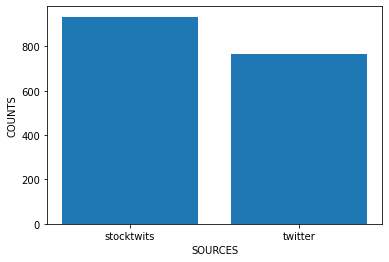

In [72]:
var=df["source"].value_counts()
plt.bar(list(var.index),height=list(var.values))
plt.xlabel("SOURCES")
plt.ylabel("COUNTS")
plt.show()

In [73]:
print("StockTwits is a social media platform designed for sharing ideas between investors, traders, and entrepreneurs.\n\n")

StockTwits is a social media platform designed for sharing ideas between investors, traders, and entrepreneurs.




In [74]:
print("A $Cashtag is a unique identifier for individuals and businesses using Cash App.")
print("\n\nThe number of cashtag in our datasets ",len(df["cashtag"].unique()))

A $Cashtag is a unique identifier for individuals and businesses using Cash App.


The number of cashtag in our datasets  684


In [75]:
df.shape

(1700, 5)

In [76]:
df.isna().sum()

source             0
cashtag            0
sentiment score    0
id                 0
spans              0
dtype: int64

In [77]:
df=df.drop(["source","cashtag","id"],axis=1)

In [78]:
df["spans"].dtypes

dtype('O')

In [79]:
df["length_span"]=df["spans"].apply(lambda x :len(x))

In [80]:
df.loc[df["length_span"]>2,"spans"].head(6)

7      [absolute garbage still up, stores TOTALLY EMP...
162    [Multi Top on $MCD,  chart finally leads to a ...
163    [US Adds 321K Jobs In November, Unemployment R...
165    [calls for nice gains, Still holding, Week mad...
194          [cracking lower early, $short, #correction]
213    [$UVXY broke 10.00 amazing!!!, not the 1st tim...
Name: spans, dtype: object

In [81]:
df["spans"].loc[7]

['absolute garbage still up', 'stores TOTALLY EMPTY', 'stock mispriced']

In [82]:
df["spans"].apply(lambda x :" ".join(x)).loc[7]

'absolute garbage still up stores TOTALLY EMPTY stock mispriced'

In [83]:
df["corrected_spans"]=df["spans"].apply(lambda x :" ".join(x))

In [84]:
print("The number of missing values :",len([1 for i in df["corrected_spans"] if i.isspace()]))

The number of missing values : 0


In [85]:
df["corrected_spans"][50:70]     #random skim of the sentences

50      $SIMO Basing nice A close over 24.18 is bullish
51    Big Money Is Pouring Into Facebook From All Di...
52                     placed an order to sell 5 shares
53                                            go $FB go
54                                    Out $BIDU for now
55             Short Setups Looking Nice....Really Nice
56                                 Defying the Downturn
57               but man this is one to be careful with
58                                            downgrade
59                                    Short $TSLA calls
60    Was looking for a long entry but today's price...
61         just follow the trend, follow the money flow
62                                     tapping on 10.00
63                      Will re-enter short on bounce..
64                Found some good bull setups this week
65                                       all going down
66                                         so volatile!
67                                     sold my 8

In [86]:
df["corrected_spans"]=df["corrected_spans"].apply(lambda x :re.sub("\$[a-zA-Z0-9]+"," ",x))

In [87]:
df["corrected_spans"]=df["corrected_spans"].apply(lambda x :re.sub("[^a-zA-Z0-9]"," ",x))

In [88]:
df["corrected_spans"]=df["corrected_spans"].apply(lambda x : " ".join(x.split()))

In [89]:
df["new_spans"]=df["corrected_spans"].apply(lambda row : " ".join([word.lower() for word in row.split()]))

In [90]:
df["new_spans"]=df["new_spans"].apply(lambda row : " ".join([word  for word in row.split() if word not in stop_words]))

In [91]:
df[["corrected_spans","new_spans","sentiment score"]].sample(n=5)

,corrected_spans,new_spans,sentiment score
1213,ended the day down,ended day,0.072
695,trying to drag with it,trying drag,-0.524
658,Aggressive Buy,aggressive buy,0.306
39,Alibaba IPO hoopla can t hide risk of Chinese ...,alibaba ipo hoopla hide risk chinese stocks,-0.390
874,Long buying point,long buying point,0.230


In [92]:
def pos_tag(sentence):
    return nltk.pos_tag(nltk.word_tokenize(sentence)) 

def pos(x):
        if x.startswith("J"):
            return wordnet.ADJ
        elif x.startswith("V"):
            return wordnet.VERB
        elif x.startswith("N"):
            return wordnet.NOUN
        elif x.startswith("R"):
            return wordnet.ADV
        return None
    
def lemmatisation(sentence):
    lem_arr=[]
    for i,y in pos_tag(sentence):
        var= pos(y)
        if var:  
            lem_arr.append(WordNetLemmatizer().lemmatize(i,var))
        else:
            lem_arr.append(i)
    return " ".join(lem_arr)
    

In [93]:
import nltk

In [94]:
lemmatisation("hello i loving you sincerely madly running better now")

'hello i love you sincerely madly run well now'

In [95]:
df["new_spans"]=df["new_spans"].apply(lambda row : lemmatisation(row))

In [96]:
a=np.array([1,20,4,90])
np.where(a>5,1,2)

array([2, 1, 2, 1])

In [97]:
df["target"]=np.where(df["sentiment score"]>0,1,0)

In [98]:
df["target"].value_counts()

1    1092
0     608
Name: target, dtype: int64

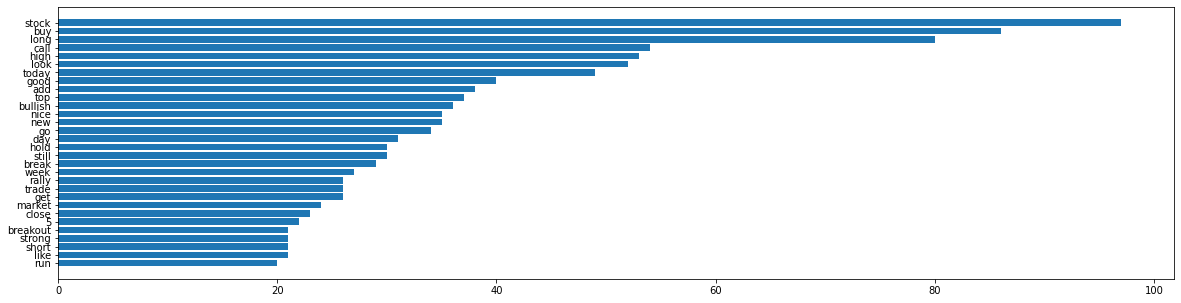

In [99]:
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['target'] == 1,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['new_spans']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

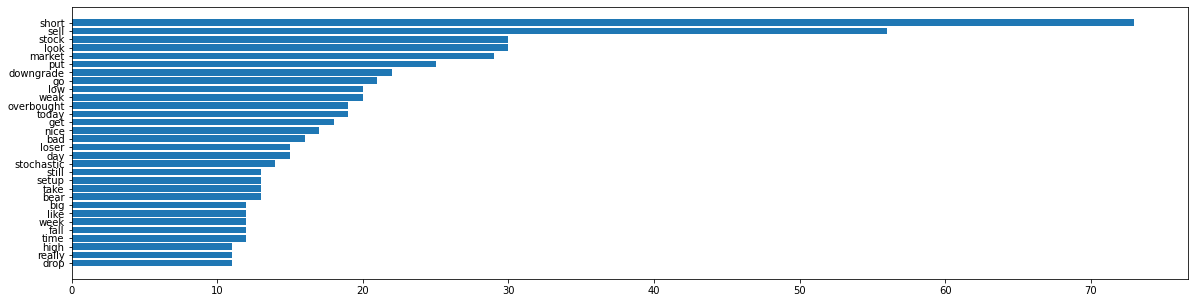

In [100]:
# from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['target'] == 0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['new_spans']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# words_df
# # Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# MODEL

In [102]:
df["new_spans"]

0                              watch bounce tomorrow
1                 record number passenger serve 2015
2                                                 35
3            look strong bounce lunchtime rally come
4               intrigue technology growth potential
                            ...                     
1695                            call put buyer crush
1696                                     buy stop 80
1697    airplane hospitality industry set sight cuba
1698                                     nice bounce
1699                                      overbought
Name: new_spans, Length: 1700, dtype: object

In [103]:
countvect=CountVectorizer(max_df=.95,min_df=3)
x=countvect.fit_transform(df["new_spans"]).toarray()

In [104]:
y=df["target"]

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=30)

In [106]:
tpr_score=[]
fpr_score=[]
auc_score=[]

In [107]:
from sklearn.naive_bayes import MultinomialNB

In [108]:
multinominal=MultinomialNB()
multinominal.fit(x_train,y_train)

MultinomialNB()

In [109]:
print(multinominal.score(x_train,y_train))
print(multinominal.score(x_test,y_test))

0.8579831932773109
0.7823529411764706


In [110]:
fpr, tpr, thresholds=roc_curve(y_test,multinominal.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,multinominal.predict_proba(x_test)[:,1]))

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("The training score : ",dt.score(x_train,y_train))
print("The testing score : ",dt.score(x_test,y_test))

The training score :  0.965546218487395
The testing score :  0.7666666666666667


In [113]:
dt.get_depth()

225

In [114]:
train_score=[]
test_score=[]
for i in range(50,220,10):
    dt=DecisionTreeClassifier(random_state=66,max_depth=i)
    dt.fit(x_train,y_train)
    train_score.append(cross_val_score(dt,x_train,y_train,cv=10).mean())

    test_score.append(dt.score(x_test,y_test))
    

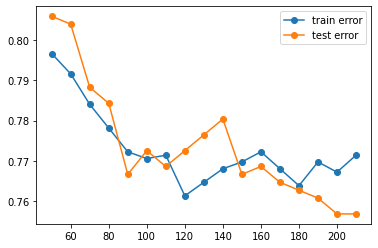

In [115]:
plt.plot(range(50,220,10),train_score,label="train error",marker="o")
plt.plot(range(50,220,10),test_score,label="test error",marker="o")
plt.legend()
# plt.savefig("G:/jupyter notebook/final project/image.jpg")
plt.show()


In [116]:
dt=DecisionTreeClassifier(max_depth=70)
dt.fit(x_train,y_train)
print("The training score : ",cross_val_score(dt,x_train,y_train).mean())
print("The testing score : ",dt.score(x_test,y_test))

The training score :  0.7806722689075629
The testing score :  0.7901960784313725


In [117]:
fpr, tpr, thresholds=roc_curve(y_test,dt.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,dt.predict_proba(x_test)[:,1]))

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
rdf=RandomForestClassifier(n_estimators=100,oob_score=True)
rdf.fit(x_train,y_train)
print("The training score : ",rdf.oob_score_)
print("The testing score : ",rdf.score(x_test,y_test))

The training score :  0.7747899159663866
The testing score :  0.7843137254901961


In [120]:
fpr, tpr, thresholds=roc_curve(y_test,rdf.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,rdf.predict_proba(x_test)[:,1]))

In [121]:
gradient_boost=GradientBoostingClassifier()
gradient_boost.fit(x_train,y_train)

GradientBoostingClassifier()

In [122]:
print("TRAINING SCORE :",gradient_boost.score(x_train,y_train))
print("TESTING SCORE  :",gradient_boost.score(x_test,y_test))

TRAINING SCORE : 0.8420168067226891
TESTING SCORE  : 0.796078431372549


In [123]:
fpr, tpr, thresholds=roc_curve(y_test,gradient_boost.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,gradient_boost.predict_proba(x_test)[:,1]))

In [124]:
len(tpr_score)

4

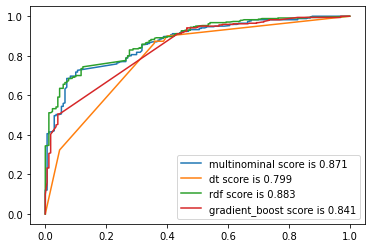

In [125]:
label=["multinominal","dt","rdf","gradient_boost"]
for i in range(len(tpr_score)):
    plt.plot(fpr_score[i],tpr_score[i],label=f"{label[i]} score is {round(auc_score[i],3)}")
    plt.legend()
plt.show()

# TFIDF VECTORIZER

In [126]:
tfidf=TfidfVectorizer(max_df=.95,min_df=2)
x=tfidf.fit_transform(df["new_spans"]).toarray()

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=11)

In [128]:
multinominal=MultinomialNB()
multinominal.fit(x_train,y_train)

MultinomialNB()

In [129]:
print(multinominal.score(x_train,y_train))
print(multinominal.score(x_test,y_test))

0.8823529411764706
0.7862745098039216


In [130]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("The training score : ",dt.score(x_train,y_train))
print("The training score : ",dt.score(x_test,y_test))

The training score :  0.9722689075630252
The training score :  0.7686274509803922


In [131]:
dt.get_depth()

246

In [132]:
train_score=[]
test_score=[]
for i in range(50,269,30):
    dt=DecisionTreeClassifier(random_state=11,max_depth=i)
    train_score.append(cross_val_score(dt,x_train,y_train,cv=10).mean())
    dt.fit(x_train,y_train)
    test_score.append(dt.score(x_test,y_test))
    

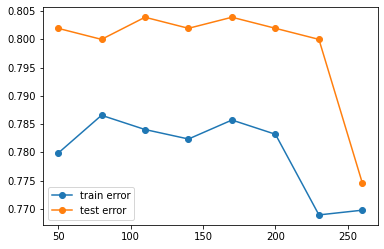

In [133]:
plt.plot(range(50,269,30),train_score,label="train error",marker="o")
plt.plot(range(50,269,30),test_score,label="test error",marker="o")
plt.legend()
# plt.savefig("G:/jupyter notebook/final project/image.jpg")
plt.show()


# LOW VARIANCE REACHED AT DEPTH=170

In [134]:
dt=DecisionTreeClassifier(max_depth=80)
dt.fit(x_train,y_train)
print("The training score : ",cross_val_score(dt,x_train,y_train).mean())
print("The training score : ",dt.score(x_test,y_test))

The training score :  0.7815126050420167
The training score :  0.803921568627451


In [135]:
rdf=RandomForestClassifier(n_estimators=100,oob_score=True)
rdf.fit(x_train,y_train)
print("The training score : ",rdf.oob_score_)
print("The testing score : ",rdf.score(x_test,y_test))

The training score :  0.8050420168067227
The testing score :  0.7941176470588235


In [136]:
gradient_boost=GradientBoostingClassifier()
gradient_boost.fit(x_train,y_train)

GradientBoostingClassifier()

In [137]:
print("TRAINING SCORE :",gradient_boost.score(x_train,y_train))
print("TESTING SCORE  :",gradient_boost.score(x_test,y_test))

TRAINING SCORE : 0.8319327731092437
TESTING SCORE  : 0.7803921568627451


In [138]:
tpr_score=[]
fpr_score=[]
auc_score=[]

In [139]:
fpr, tpr, thresholds=roc_curve(y_test,multinominal.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,multinominal.predict_proba(x_test)[:,1]))

fpr, tpr, thresholds=roc_curve(y_test,dt.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,dt.predict_proba(x_test)[:,1]))

fpr, tpr, thresholds=roc_curve(y_test,rdf.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,rdf.predict_proba(x_test)[:,1]))

fpr, tpr, thresholds=roc_curve(y_test,gradient_boost.predict_proba(x_test)[:,1])
tpr_score.append(tpr)
fpr_score.append(fpr)
auc_score.append(roc_auc_score(y_test,gradient_boost.predict_proba(x_test)[:,1]))

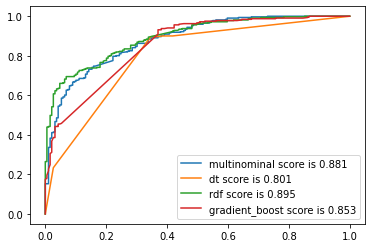

In [140]:
label=["multinominal","dt","rdf","gradient_boost"]
for i in range(len(tpr_score)):
    plt.plot(fpr_score[i],tpr_score[i],label=f"{label[i]} score is {round(auc_score[i],3)}")
    plt.legend()
plt.show()